In [5]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
from matplotlib import pyplot

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

In [7]:
# Importar libreria para dividir entrenamiento y prueba
from sklearn.model_selection import train_test_split

In [8]:
# Especificar la ruta del archivo
data = pd.read_csv("/content/Loan_Data.csv")

In [9]:
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN           

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
columnas_categoricas = data.select_dtypes(include=['object']).columns

In [12]:
#Procesamiento de frases o palabras
for columna in columnas_categoricas:
  le = LabelEncoder()
  data[columna] = le.fit_transform(data[columna])

In [13]:
print(data)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
0          0       1        0           0          0              0   
1          1       1        1           1          0              0   
2          2       1        1           0          0              1   
3          3       1        1           0          1              0   
4          4       1        0           0          0              0   
..       ...     ...      ...         ...        ...            ...   
609      609       0        0           0          0              0   
610      610       1        1           3          0              0   
611      611       1        1           1          0              0   
612      612       1        1           2          0              0   
613      613       0        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    int64  
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 62.5 KB


In [15]:
#llenar datos vacios
columnas_especificas = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
media_columnas = data[columnas_especificas].mean()
data[columnas_especificas] = data[columnas_especificas].fillna(media_columnas)

In [16]:
#eliminar columna Loan_ID
columna_eliminada = 'Loan_ID'
data.drop(columna_eliminada, axis=1, inplace=True)

In [17]:
print(data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [19]:
# Division de dataset en entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [20]:
print(train_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
83        1        1           0          0              0             6000   
90        1        1           0          0              0             2958   
227       1        1           2          0              0             6250   
482       1        1           0          0              0             2083   
464       1        0           0          0              0             4166   
..      ...      ...         ...        ...            ...              ...   
71        1        1           2          1              1             1875   
106       1        1           2          0              0            11417   
270       0        0           0          0              0             3237   
435       0        2           4          0              0            10047   
102       1        1           4          0              0            13650   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [21]:
print(test_data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
350       1        1           0          0              0             9083   
377       1        1           0          0              0             4310   
163       1        1           2          0              0             4167   
609       0        0           0          0              0             2900   
132       1        0           0          0              0             2718   
..      ...      ...         ...        ...            ...              ...   
231       1        1           0          0              2             3716   
312       0        0           0          0              0             2507   
248       1        1           1          0              0             2882   
11        1        1           2          0              2             2500   
333       1        1           0          0              2            63337   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 83 to 102
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             491 non-null    int64  
 1   Married            491 non-null    int64  
 2   Dependents         491 non-null    int64  
 3   Education          491 non-null    int64  
 4   Self_Employed      491 non-null    int64  
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         491 non-null    float64
 8   Loan_Amount_Term   491 non-null    float64
 9   Credit_History     491 non-null    float64
 10  Property_Area      491 non-null    int64  
 11  Loan_Status        491 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 49.9 KB


In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 350 to 333
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             123 non-null    int64  
 1   Married            123 non-null    int64  
 2   Dependents         123 non-null    int64  
 3   Education          123 non-null    int64  
 4   Self_Employed      123 non-null    int64  
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         123 non-null    float64
 8   Loan_Amount_Term   123 non-null    float64
 9   Credit_History     123 non-null    float64
 10  Property_Area      123 non-null    int64  
 11  Loan_Status        123 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 12.5 KB


In [24]:
train_data.to_csv("train.csv", index=False)

In [25]:
test_data.to_csv("test.csv", index=False)

In [26]:
#Carga de dataset de entrenamiento
data = pd.read_csv('/content/train.csv')

In [27]:
X = data.iloc[:, :11]
y = data.iloc[:, 11]
m = y.size

In [28]:
print(X)
print('*'*25)
print(y)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           0          0              0             6000   
1         1        1           0          0              0             2958   
2         1        1           2          0              0             6250   
3         1        1           0          0              0             2083   
4         1        0           0          0              0             4166   
..      ...      ...         ...        ...            ...              ...   
486       1        1           2          1              1             1875   
487       1        1           2          0              0            11417   
488       0        0           0          0              0             3237   
489       0        2           4          0              0            10047   
490       1        1           4          0              0            13650   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [29]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [30]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X.shape
# Agraga el termino de intercepción a A
X = np.concatenate([np.ones((m, 1)), X], axis=1)

In [31]:
print(X)

[[  1.           1.           1.         ... 360.           0.84219858
    1.        ]
 [  1.           1.           1.         ... 360.           1.
    1.        ]
 [  1.           1.           1.         ... 360.           1.
    1.        ]
 ...
 [  1.           0.           0.         ... 360.           1.
    2.        ]
 [  1.           0.           2.         ... 240.           1.
    1.        ]
 [  1.           1.           1.         ... 360.           1.
    2.        ]]


In [32]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

In [33]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

In [34]:
#Carga de dataset de prueba
data = pd.read_csv('/content/test.csv')
print(data)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        1           0          0              0             9083   
1         1        1           0          0              0             4310   
2         1        1           2          0              0             4167   
3         0        0           0          0              0             2900   
4         1        0           0          0              0             2718   
..      ...      ...         ...        ...            ...              ...   
118       1        1           0          0              2             3716   
119       0        0           0          0              0             2507   
120       1        1           1          0              0             2882   
121       1        1           2          0              2             2500   
122       1        1           0          0              2            63337   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [35]:
fila_deseada = 8

if fila_deseada < len(data):
  fila_completa = data.iloc[fila_deseada].to_numpy()
  print(fila_completa)
else:
  print("La fila no existe")

[1.000e+00 1.000e+00 3.000e+00 1.000e+00 0.000e+00 2.647e+03 1.587e+03
 1.730e+02 3.600e+02 1.000e+00 0.000e+00 0.000e+00]


<ipython-input-32-9bf1ce321844>:7: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
<ipython-input-29-22f640bc02db>:8: RuntimeWarning: overflow encountered in exp
  g = 1 / (1 + np.exp(-z))


theta calculado por el descenso por el gradiente: [ 0.35697182  0.66018118  3.44229237  0.03406277 -1.18496966  0.86626231
 -1.06290524 -5.67420768  8.25105104 20.05087562  8.93419215  0.97361085]
El prestame se da (usando el descenso por el gradiente):0.0


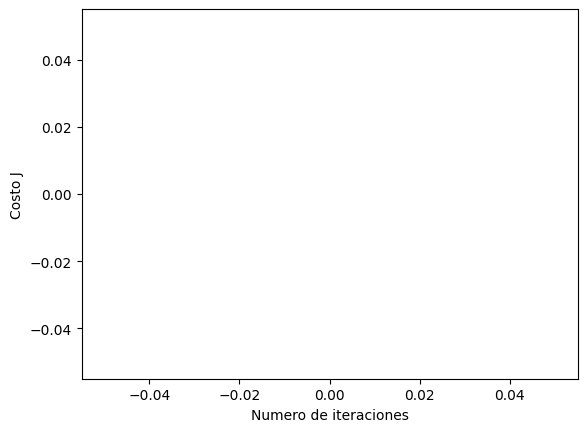

In [38]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.01
num_iters = 10000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(12)
theta, J_history = descensoGradiente(theta, X, y, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si se da el prestamo o no
X_array = [1, 1.000e+00, 1.000e+00, 3.000e+00, 1.000e+00, 0.000e+00, 2.647e+03, 1.587e+03, 1.730e+02, 3.600e+02, 1.000e+00, 0.000e+00]

aprueba = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

#print(f"Un estudiante con nota del examen 1: {X_array[1]} y nota del examen 2: {X_array[2]} (usando el descenso por el gradiente):{aprueba}")
print(f"El prestame se da (usando el descenso por el gradiente):{aprueba}")